In [1]:
# @title
import pandas as pd

# Define the local path and the URL for the covid dataset
local_path = '/content/owid-covid-data.csv'
covid_url = 'https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv'

try:
    # Try to read the Titanic dataset from the local path
    df = pd.read_csv(local_path)
    print(f"Successfully loaded data from {local_path}")
    print("\n")
except FileNotFoundError:
    # If the local file is not found, read the dataset from the URL
    df = pd.read_csv(covid_url)
    print(f"Local file not found. Loading data from {covid_url}")
    print("\n")

print(f"Total number of columns: {df.shape[1]}")
print(f"Total number of rows: {df.shape[0]}")

# Identify and count missing values in each column
print(df.isnull().sum())

# Display columns with missing values and count how many columns have no missing values
missing_cols = df.isnull().sum() != 0
print(f"Number of columns with no missing values: {len(missing_cols) - missing_cols.sum()}")
print(f"Number of columns with missing values: {missing_cols.sum()}")

missing_values_percentage = df.isnull().mean() * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index.tolist()

print("Columns with more than 90% missing values:")
print(columns_to_drop)

# Print number of columns to be dropped
print(f"Number of columns to be dropped: {len(columns_to_drop)}")
print("Column Names to be dropped:")
print(columns_to_drop)

# Remove columns with more than 90% missing values
df = df.drop(columns=columns_to_drop)

# Print number of columns remaining
print("\n")
print(f"Number of columns after removal: {df.shape[1]}")

# Convert the 'date' column from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

# Print the number of missing values per column before imputation
print("Number of missing values per column before imputation:")
print(df.isnull().sum())

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print (f"Number of columns with numerical value :{len(numerical_cols)}")

# Impute missing values in numerical columns using the mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print (f"Number of columns with non-numerical value :{len(categorical_cols)}")

# Impute missing values in categorical columns using the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # mode() can return multiple values, take the first
        df[col] = df[col].fillna(mode_val)

# Print the number of remaining missing values per column
print("\nNumber of remaining missing values per column after imputation:")
print(df.isnull().sum())

# Get the number of rows before removing duplicates
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Count the number of unique duplicate rows
unique_duplicate_rows = df[df.duplicated()].shape[0]
print(f"Number of unique duplicate rows: {unique_duplicate_rows}")

# Remove duplicate rows
df = df.drop_duplicates()

# Get the number of rows after removing duplicates
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Get unique countries from the 'location' column
unique_countries = df['location'].unique()

# Count the number of unique countries
num_unique_countries = len(unique_countries)

# Print the total count of unique countries
print(f"Total number of unique countries: {num_unique_countries}")

# Display the list of unique countries
print("\nList of unique countries:")
print(unique_countries)

Local file not found. Loading data from https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv


Total number of columns: 67
Total number of rows: 358838
iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
Number of columns with no missing values: 4
Number of columns with missing values: 63
Columns with more than 90% missing values:
['weekly_icu_admissions', 'weekly_

#Activity 5: Time Series Analysis
Time Series Analysis Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and monitoring testing metrics for a comprehensive global overview.

## Visualize daily trends
1. Explore the daily trend of new cases and new deaths globally using line plots.

### Prepare data for global analysis
Group the data by date and sum the 'new_cases' and 'new_deaths' to get daily global totals.


**Reasoning**:
Group the data by date and sum the 'new_cases' and 'new_deaths' to get daily global totals.



In [2]:
global_daily_cases_deaths = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()
display(global_daily_cases_deaths.head())

,date,new_cases,new_deaths
0,2020-01-01,18751.011265,167.031072
1,2020-01-02,18751.011265,167.031072
2,2020-01-03,0.000000,0.000000
3,2020-01-04,14.000000,0.000000
4,2020-01-05,9375.505633,15.000000


**Reasoning**:
Plot the daily global new cases and new deaths using line plots as requested by the instructions.



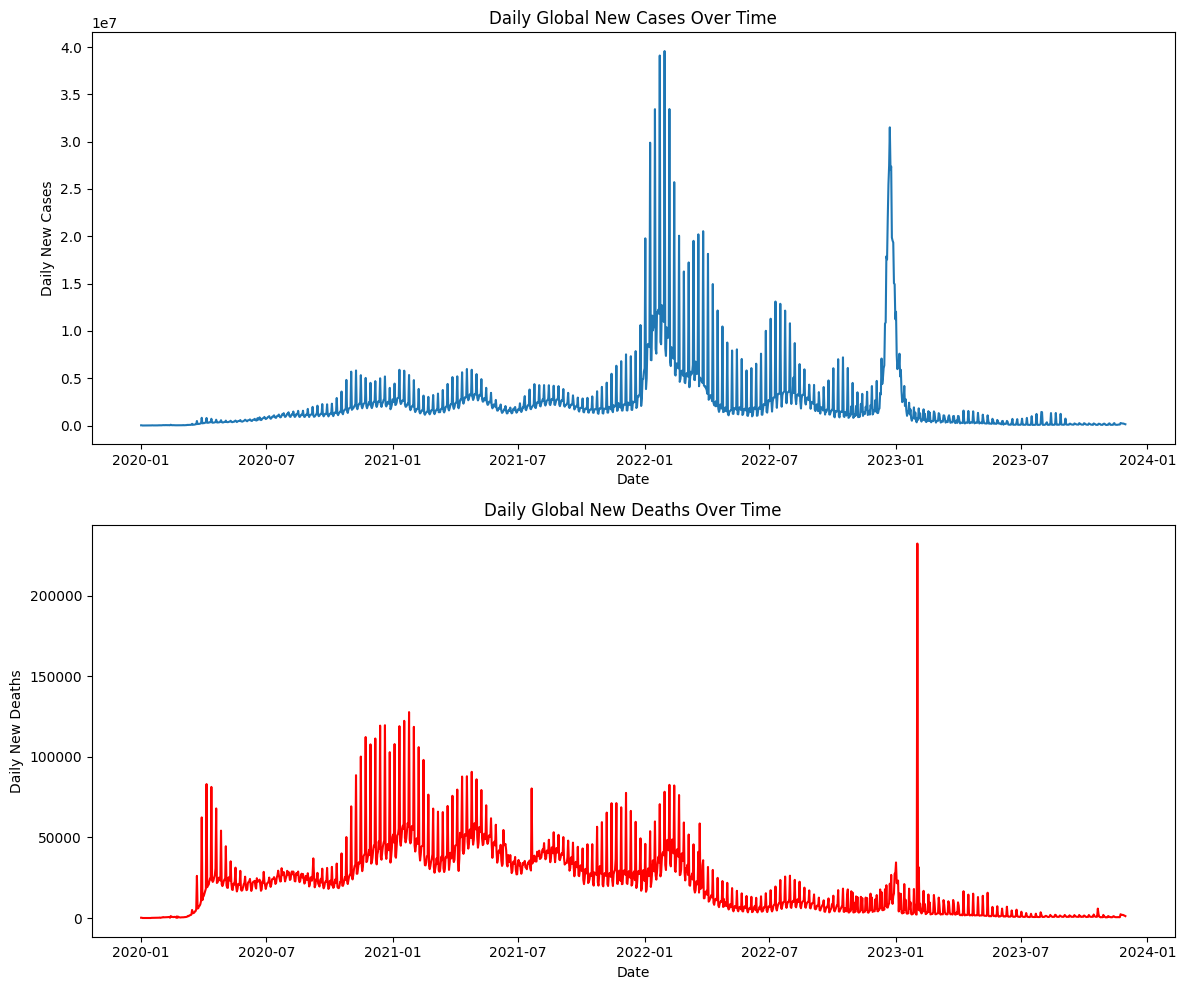

"\ndaily_trend = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()\n\n# Create line plots\nplt.figure(figsize=(12,6))\n\nsns.lineplot(data=daily_trend, x='date', y='new_cases', label='New Cases', linewidth=2)\nsns.lineplot(data=daily_trend, x='date', y='new_deaths', label='New Deaths', linewidth=2, color='red')\n\n# 4️⃣ Add titles and labels\nplt.title('Global Daily Trend of New COVID-19 Cases and Deaths')\nplt.xlabel('Date')\nplt.ylabel('Count')\nplt.legend()\nplt.grid(True, linestyle='--', alpha=0.7)\n\nplt.tight_layout()\nplt.show()\n"

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(global_daily_cases_deaths['date'], global_daily_cases_deaths['new_cases'])
axes[0].set_title('Daily Global New Cases Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily New Cases')

axes[1].plot(global_daily_cases_deaths['date'], global_daily_cases_deaths['new_deaths'], color='red')
axes[1].set_title('Daily Global New Deaths Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily New Deaths')

plt.tight_layout()
plt.show()

'''
daily_trend = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

# Create line plots
plt.figure(figsize=(12,6))

sns.lineplot(data=daily_trend, x='date', y='new_cases', label='New Cases', linewidth=2)
sns.lineplot(data=daily_trend, x='date', y='new_deaths', label='New Deaths', linewidth=2, color='red')

# 4️⃣ Add titles and labels
plt.title('Global Daily Trend of New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
'''

## Calculate and visualize daily averages
2. Calculate and visualize the daily average new cases and deaths globally.


**Reasoning**:
Calculate the 7-day rolling average for 'new_cases' and 'new_deaths' in the `global_daily_cases_deaths` DataFrame and store them in new columns. Then, create a figure with two subplots and plot the rolling averages against date with appropriate titles and labels.



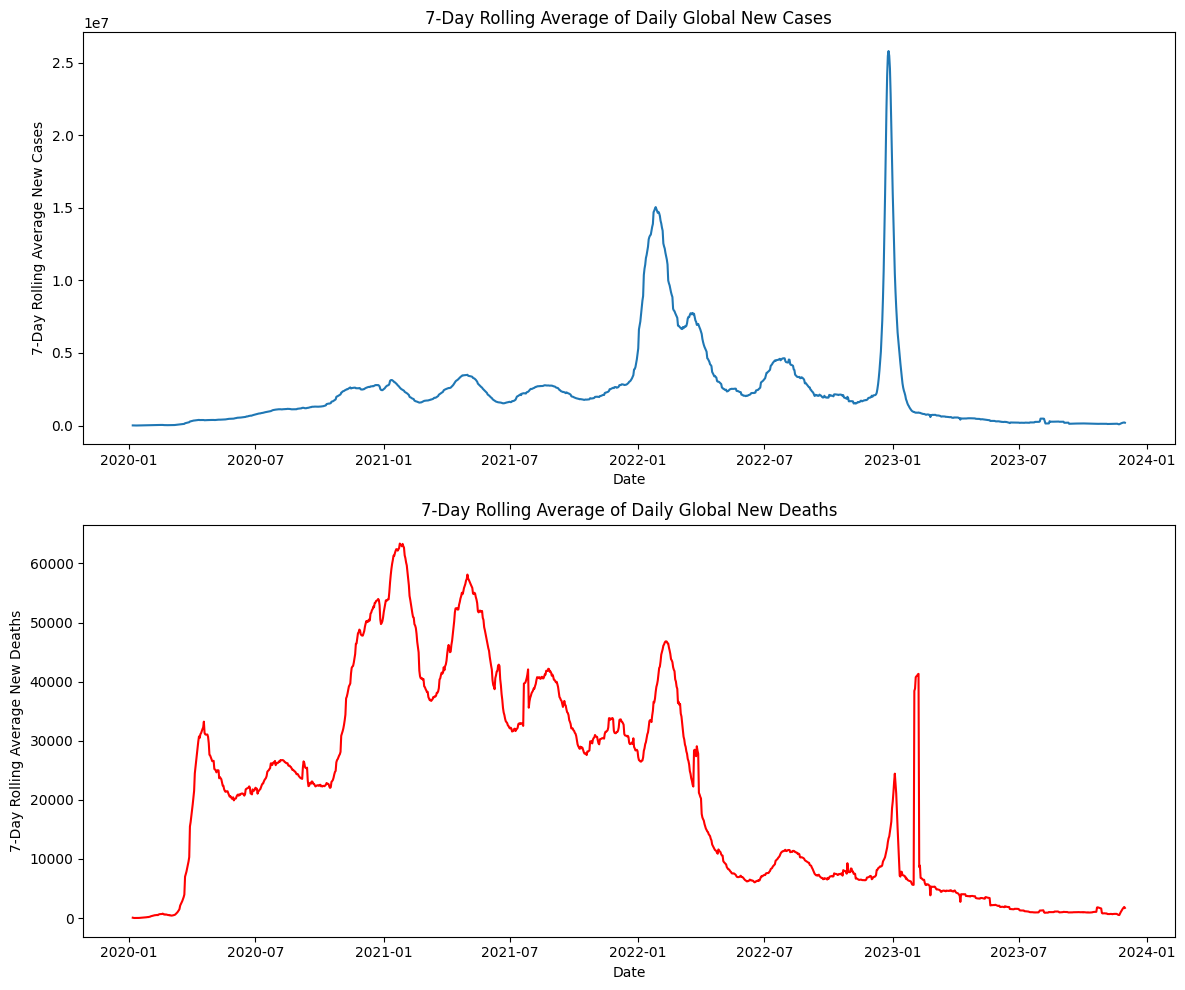

"\ndaily_avg = df.groupby('date')[['new_cases', 'new_deaths']].mean().reset_index()\n\n# 3️⃣ Plot the daily average trends\nplt.figure(figsize=(12,6))\n\nsns.lineplot(data=daily_avg, x='date', y='new_cases', label='Average New Cases', linewidth=2)\nsns.lineplot(data=daily_avg, x='date', y='new_deaths', label='Average New Deaths', linewidth=2, color='red')\n\n# 4️⃣ Add titles and labels\nplt.title('Global Daily Average of New COVID-19 Cases and Deaths')\nplt.xlabel('Date')\nplt.ylabel('Average Count per Country')\nplt.legend()\nplt.grid(True, linestyle='--', alpha=0.7)\n\nplt.tight_layout()\nplt.show()\n"

In [4]:
global_daily_cases_deaths['rolling_average_cases'] = global_daily_cases_deaths['new_cases'].rolling(window=7).mean()
global_daily_cases_deaths['rolling_average_deaths'] = global_daily_cases_deaths['new_deaths'].rolling(window=7).mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(global_daily_cases_deaths['date'], global_daily_cases_deaths['rolling_average_cases'])
axes[0].set_title('7-Day Rolling Average of Daily Global New Cases')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('7-Day Rolling Average New Cases')

axes[1].plot(global_daily_cases_deaths['date'], global_daily_cases_deaths['rolling_average_deaths'], color='red')
axes[1].set_title('7-Day Rolling Average of Daily Global New Deaths')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('7-Day Rolling Average New Deaths')

plt.tight_layout()
plt.show()

'''
daily_avg = df.groupby('date')[['new_cases', 'new_deaths']].mean().reset_index()

# 3️⃣ Plot the daily average trends
plt.figure(figsize=(12,6))

sns.lineplot(data=daily_avg, x='date', y='new_cases', label='Average New Cases', linewidth=2)
sns.lineplot(data=daily_avg, x='date', y='new_deaths', label='Average New Deaths', linewidth=2, color='red')

# 4️⃣ Add titles and labels
plt.title('Global Daily Average of New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Average Count per Country')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
'''

## Visualize vaccination trend
3. Explore the trend of vaccination coverage over time globally.

### Prepare data for vaccination analysis
Group the data by date and sum the relevant vaccination columns to get daily global vaccination totals.


**Reasoning**:
Select the relevant vaccination columns, group the data by date, sum the selected columns, and reset the index to get the daily global vaccination totals.



In [5]:
vaccination_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
global_daily_vaccinations = df.groupby('date')[vaccination_cols].sum().reset_index()
display(global_daily_vaccinations.head())

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-01-01,9.243474e+08,4.101988e+08,3.744132e+08
1,2020-01-02,9.243474e+08,4.101988e+08,3.744132e+08
2,2020-01-03,1.136947e+11,5.045445e+10,4.605283e+10
3,2020-01-04,1.136947e+11,5.045445e+10,4.605283e+10
4,2020-01-05,1.136947e+11,5.045445e+10,4.605283e+10


**Reasoning**:
Create a figure and plot the global vaccination trends over time for total vaccinations, people vaccinated, and people fully vaccinated.



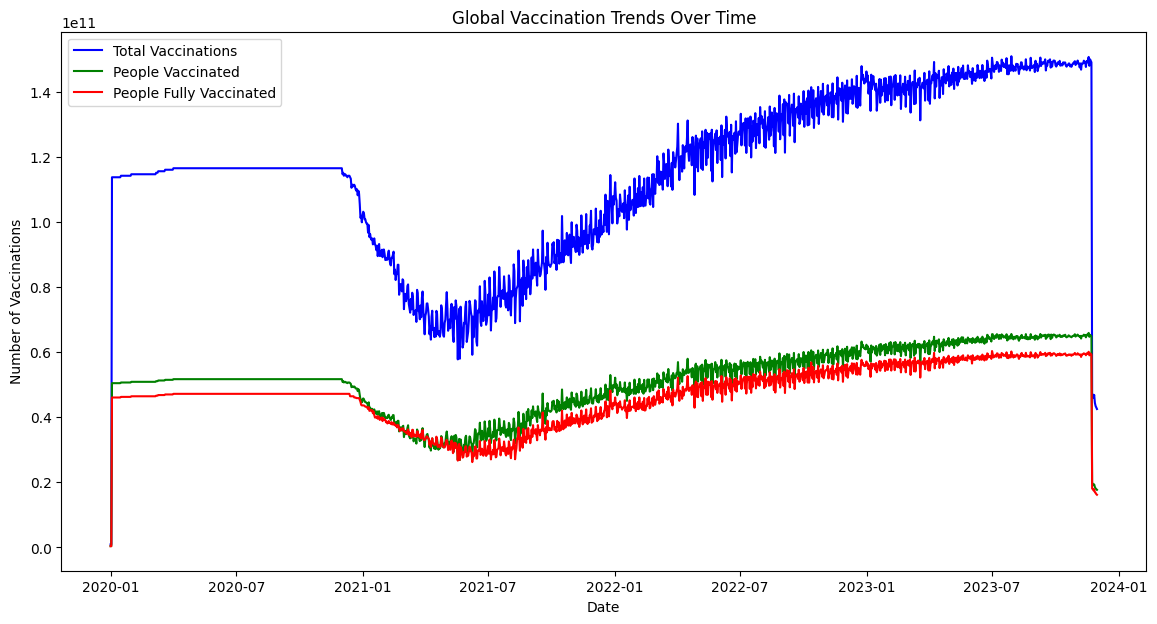

"\nglobal_vax = df_cleaned.groupby('date')['people_vaccinated'].sum().reset_index()\n\n# 3️⃣ Create a line plot to visualize the trend\nplt.figure(figsize=(12,6))\nsns.lineplot(data=global_vax, x='date', y='people_vaccinated', color='green', linewidth=2)\n\n# 4️⃣ Add titles and labels\nplt.title('Global Trend of COVID-19 Vaccination Coverage Over Time')\nplt.xlabel('Date')\nplt.ylabel('Total People Vaccinated (Cumulative)')\nplt.grid(True, linestyle='--', alpha=0.7)\n\nplt.tight_layout()\nplt.show()\n"

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(global_daily_vaccinations['date'], global_daily_vaccinations['total_vaccinations'], label='Total Vaccinations', color='blue')
plt.plot(global_daily_vaccinations['date'], global_daily_vaccinations['people_vaccinated'], label='People Vaccinated', color='green')
plt.plot(global_daily_vaccinations['date'], global_daily_vaccinations['people_fully_vaccinated'], label='People Fully Vaccinated', color='red')
plt.title('Global Vaccination Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.legend()
plt.show()

'''
global_vax = df_cleaned.groupby('date')['people_vaccinated'].sum().reset_index()

# 3️⃣ Create a line plot to visualize the trend
plt.figure(figsize=(12,6))
sns.lineplot(data=global_vax, x='date', y='people_vaccinated', color='green', linewidth=2)

# 4️⃣ Add titles and labels
plt.title('Global Trend of COVID-19 Vaccination Coverage Over Time')
plt.xlabel('Date')
plt.ylabel('Total People Vaccinated (Cumulative)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
'''

## Analyze and visualize testing metrics
4. Analyze the total tests and positive rate over time globally.

### Prepare data for testing analysis
Group the data by date and sum the relevant testing columns to get daily global testing totals.


**Reasoning**:
Create a list of testing-related columns, group the dataframe by date, select the testing columns, calculate their sum, reset the index, store the result in a new dataframe, and display its head.



In [7]:
testing_cols = ['total_tests', 'positive_rate']
global_daily_testing = df.groupby('date')[testing_cols].sum().reset_index()
display(global_daily_testing.head())

,date,total_tests,positive_rate
0,2020-01-01,2.900000e+01,0.196325
1,2020-01-02,1.960000e+02,0.196325
2,2020-01-03,5.149516e+09,24.147976
3,2020-01-04,5.128412e+09,24.147976
4,2020-01-05,5.128412e+09,24.147976


**Reasoning**:
Plot the total tests and positive rate over time globally using subplots.



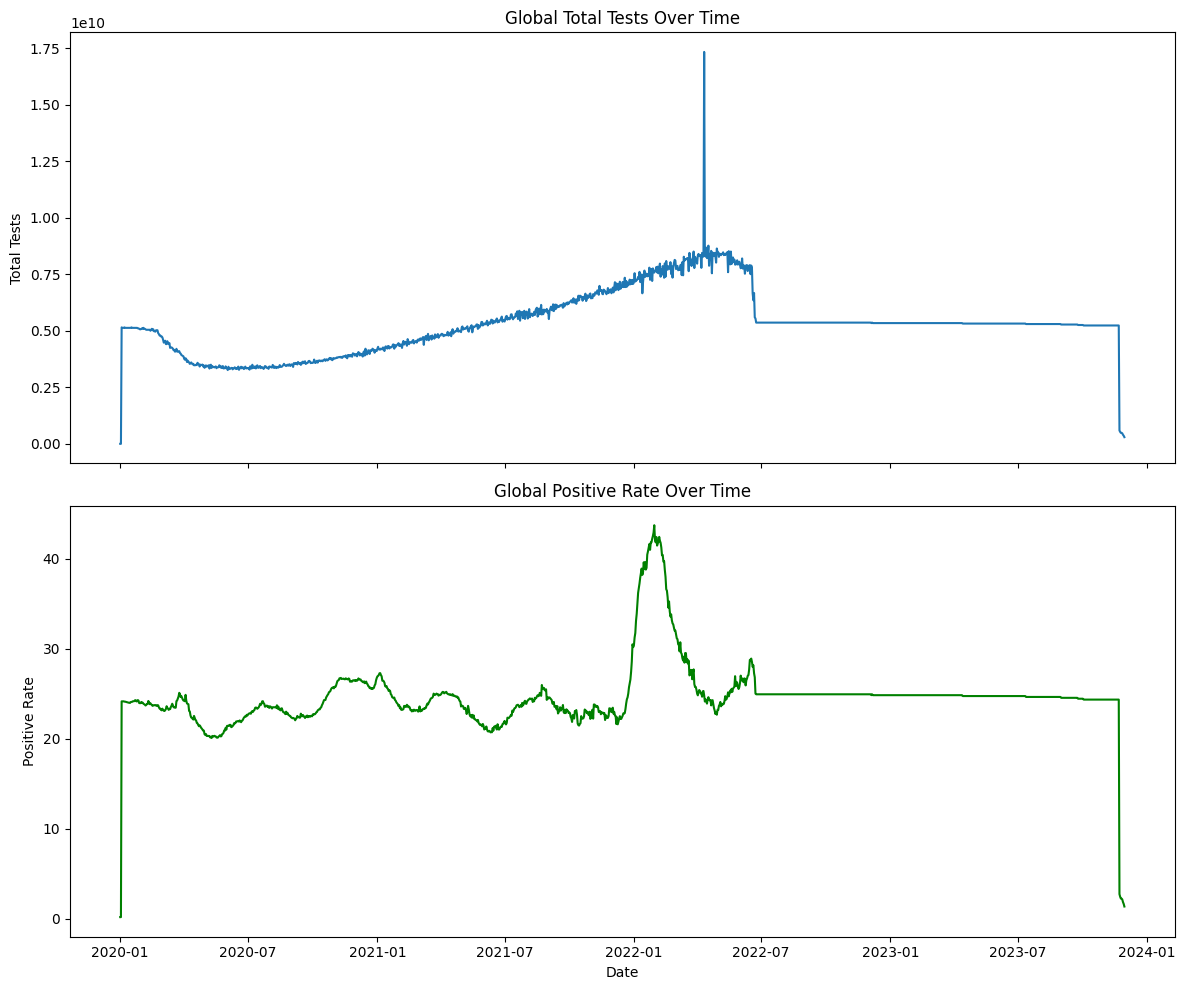

"\n# 5.4. Analyze the total tests and positive rate over time globally\nglobal_tests = df_cleaned.groupby('date')[['total_tests', 'positive_rate']].mean().reset_index()\n\n# 3️⃣ Create a dual-axis plot for better comparison\nfig, ax1 = plt.subplots(figsize=(12,6))\n\n# Plot total tests (left axis)\nsns.lineplot(data=global_tests, x='date', y='total_tests', color='blue', ax=ax1, label='Total Tests')\nax1.set_xlabel('Date')\nax1.set_ylabel('Total Tests (average per country)', color='blue')\nax1.tick_params(axis='y', labelcolor='blue')\n\n# Create second axis for positive rate\nax2 = ax1.twinx()\nsns.lineplot(data=global_tests, x='date', y='positive_rate', color='red', ax=ax2, label='Positive Rate')\nax2.set_ylabel('Positive Rate (%)', color='red')\nax2.tick_params(axis='y', labelcolor='red')\n"

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axes[0].plot(global_daily_testing['date'], global_daily_testing['total_tests'])
axes[0].set_title('Global Total Tests Over Time')
axes[0].set_ylabel('Total Tests')

axes[1].plot(global_daily_testing['date'], global_daily_testing['positive_rate'], color='green')
axes[1].set_title('Global Positive Rate Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Positive Rate')

plt.tight_layout()
plt.show()

'''
# 5.4. Analyze the total tests and positive rate over time globally
global_tests = df_cleaned.groupby('date')[['total_tests', 'positive_rate']].mean().reset_index()

# 3️⃣ Create a dual-axis plot for better comparison
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot total tests (left axis)
sns.lineplot(data=global_tests, x='date', y='total_tests', color='blue', ax=ax1, label='Total Tests')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Tests (average per country)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis for positive rate
ax2 = ax1.twinx()
sns.lineplot(data=global_tests, x='date', y='positive_rate', color='red', ax=ax2, label='Positive Rate')
ax2.set_ylabel('Positive Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
'''

## Summary:

### Data Analysis Key Findings

* The daily global new cases and new deaths were calculated by grouping the data by date and summing the respective columns.
* The 7-day rolling averages for global new cases and new deaths were calculated and visualized, providing a smoothed trend of the daily dynamics.
* Global vaccination data, including total vaccinations, people vaccinated, and people fully vaccinated, were aggregated daily and plotted to show the overall vaccination progress.
* Global testing data, specifically total tests and positive rate, were aggregated daily and visualized to show the trends in testing metrics.

### Insights or Next Steps

* The rolling averages provide a clearer picture of the pandemic's trajectory by smoothing out daily fluctuations, which can be useful for identifying longer-term trends and potential turning points.
* Further analysis could explore the correlation between vaccination rates, testing rates, positive rates, and the trends in new cases and deaths to assess the impact of these factors on the pandemic's spread.
